## Bayesian Optimization

## Optimzation technique along with Random Forest classifier

In [2]:
import pandas as pd
import numpy as np

In [8]:
# file preview shows a header row
diabetes =pd.read_csv("diabetes.csv")

In [9]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
import numpy as np
diabetes['Glucose']=np.where(diabetes['Glucose']==0,diabetes['Glucose'].median(),diabetes['Glucose'])
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


In [13]:
X=diabetes.drop('Outcome',axis=1)
y=diabetes['Outcome']

In [14]:
pd.DataFrame(X,columns=diabetes.columns[:-1])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72,35,0,33.6,0.627,50
1,1,85.0,66,29,0,26.6,0.351,31
2,8,183.0,64,0,0,23.3,0.672,32
3,1,89.0,66,23,94,28.1,0.167,21
4,0,137.0,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180,32.9,0.171,63
764,2,122.0,70,27,0,36.8,0.340,27
765,5,121.0,72,23,112,26.2,0.245,30
766,1,126.0,60,0,0,30.1,0.349,47


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [17]:
pip install hyperopt

  Using cached hyperopt-0.2.7-py2.py3-none-any.whl (1.6 MB)
  Using cached py4j-0.10.9.7-py2.py3-none-any.whl (200 kB)
Note: you may need to restart the kernel to use updated packages.


In [18]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

In [19]:
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
    }

In [20]:
space

{'criterion': <hyperopt.pyll.base.Apply at 0x29122eafeb0>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x29122eaf4c0>,
 'max_features': <hyperopt.pyll.base.Apply at 0x29122eaf3a0>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x29122ea4ac0>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x29122ea4c10>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x29122ea4f10>}

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [22]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

100%|████████████████████████████████████████████████| 80/80 [08:51<00:00,  6.65s/trial, best loss: -0.765453818472611]


{'criterion': 0,
 'max_depth': 1160.0,
 'max_features': 2,
 'min_samples_leaf': 0.09545267232010493,
 'min_samples_split': 0.00029073497039588947,
 'n_estimators': 3}

In [23]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200,5:1300,6:1500}


print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])

entropy
log2
750


In [24]:
best['min_samples_leaf']

0.09545267232010493

In [25]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]).fit(X_train,y_train)
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(accuracy_score(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc5 = accuracy_score(y_test,predictionforest)

[[96 11]
 [25 22]]
0.7662337662337663
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       107
           1       0.67      0.47      0.55        47

    accuracy                           0.77       154
   macro avg       0.73      0.68      0.70       154
weighted avg       0.75      0.77      0.75       154



<function matplotlib.pyplot.show(close=None, block=None)>

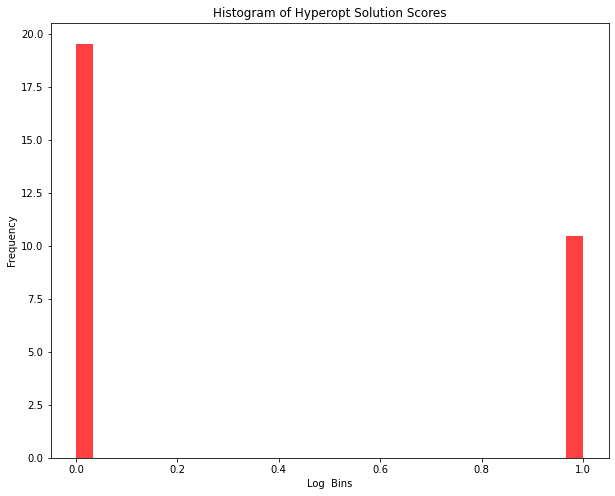

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.xlabel('Log  Bins')
plt.ylabel('Frequency')
plt.title('Histogram of Hyperopt Solution Scores')
plt.hist(y, 30, density=True, facecolor='r', alpha=0.75)
plt.show

In [27]:
# Importing modules that are required
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge
   

In [28]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [29]:
# Creating and training model
model = BayesianRidge()
model.fit(X_train, y_train)

BayesianRidge()

In [30]:
# Model making a prediction on test data
prediction = model.predict(X_test)

In [31]:
# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(y_test, prediction)}")

r2 Score Of Test Set : 0.22434118450307272


In [42]:

# example of bayesian optimization for a 1d function from scratch
from math import sin
from math import pi
from numpy import arange
from numpy import vstack
from numpy import argmax
from numpy import asarray
from numpy.random import normal
from numpy.random import random
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter
from matplotlib import pyplot

In [43]:
# define the model
model = GaussianProcessRegressor()

In [44]:
# objective function
def objective(x, noise=0.1):
	noise = normal(loc=0, scale=noise)
	return (x**2 * sin(5 * pi * x)**6.0) + noise

In [45]:
# surrogate or approximation for the objective function
def surrogate(model, X):
	# catch any warning generated when making a prediction
	with catch_warnings():
		# ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)

In [46]:
# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
	# calculate the best surrogate score found so far
	yhat, _ = surrogate(model, X)
	best = max(yhat)
	# calculate mean and stdev via surrogate function
	mu, std = surrogate(model, Xsamples)
	mu = mu[:, 0]
	# calculate the probability of improvement
	probs = norm.cdf((mu - best) / (std+1E-9))
	return probs

In [47]:
# optimize the acquisition function
def opt_acquisition(X, y, model):
	# random search, generate random samples
	Xsamples = random(100)
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	# calculate the acquisition function for each sample
	scores = acquisition(X, Xsamples, model)
	# locate the index of the largest scores
	ix = argmax(scores)
	return Xsamples[ix, 0]
 

In [48]:
# plot real observations vs surrogate function
def plot(X, y, model):
	# scatter plot of inputs and real objective function
	pyplot.scatter(X, y)
	# line plot of surrogate function across domain
	Xsamples = asarray(arange(0, 1, 0.001))
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	ysamples, _ = surrogate(model, Xsamples)
	pyplot.plot(Xsamples, ysamples)
	# show the plot
	pyplot.show()

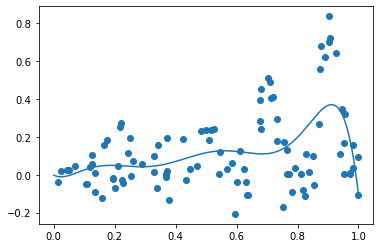

In [49]:
# sample the domain sparsely with noise
X = random(100)
y = asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand
plot(X, y, model)

In [50]:
# perform the optimization process
for i in range(100):
	# select the next point to sample
	x = opt_acquisition(X, y, model)
	# sample the point
	actual = objective(x)
	# summarize the finding
	est, _ = surrogate(model, [[x]])
	print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
	# add the data to the dataset
	X = vstack((X, [[x]]))
	y = vstack((y, [[actual]]))
	# update the model
	model.fit(X, y)

>x=0.707, f()=0.112139, actual=0.488
>x=0.908, f()=0.365309, actual=0.811
>x=0.581, f()=0.133133, actual=0.066
>x=0.050, f()=-0.005661, actual=0.038
>x=0.911, f()=0.395802, actual=0.846
>x=0.912, f()=0.424689, actual=0.884
>x=0.236, f()=0.042936, actual=0.061
>x=0.911, f()=0.452448, actual=0.807
>x=0.914, f()=0.472624, actual=0.560
>x=0.912, f()=0.477437, actual=0.688
>x=0.135, f()=0.047488, actual=-0.108
>x=0.913, f()=0.487866, actual=0.766
>x=0.516, f()=0.132425, actual=0.089
>x=0.206, f()=0.043794, actual=-0.191
>x=0.913, f()=0.501493, actual=0.805
>x=0.281, f()=0.025225, actual=-0.007
>x=0.416, f()=0.081909, actual=-0.071
>x=0.496, f()=0.121450, actual=0.182
>x=0.486, f()=0.120445, actual=0.391
>x=0.958, f()=0.378929, actual=0.016
>x=0.910, f()=0.505089, actual=0.712
>x=0.194, f()=0.029846, actual=0.045
>x=0.912, f()=0.514084, actual=0.823
>x=0.570, f()=0.140045, actual=0.146
>x=0.911, f()=0.526873, actual=0.935
>x=0.911, f()=0.543148, actual=0.839
>x=0.911, f()=0.554431, actual=0.

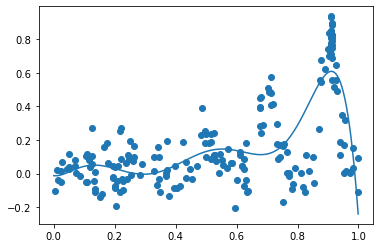

Best Result: x=0.911, y=0.937


In [51]:
# plot all samples and the final surrogate function
plot(X, y, model)
# best result
ix = argmax(y)
print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))